# Part 0. Prepare the data

In [20]:
import numpy as np
from keras import layers
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
import keras.layers as layers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from functools import partial

%matplotlib inline

In [2]:
max_features = 10000
max_len = 250

np.load.__defaults__=(None, True, True, 'ASCII')
(train_text, train_labels), (test_text, test_labels) = imdb.load_data(num_words = max_features)
np.load.__defaults__=(None, False, True, 'ASCII')

train_text = preprocessing.sequence.pad_sequences(train_text, maxlen = max_len)
test_text = preprocessing.sequence.pad_sequences(test_text, maxlen = max_len)

In [4]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.figure(0)
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()

def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.figure(1)
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')

In [7]:
filepath = 'my_model_file.hdf5'
callbacks = [
        EarlyStopping(
            monitor = 'val_loss',
            patience = 1
        ),
        ModelCheckpoint(
            filepath = filepath,
            monitor = 'val_loss',
            save_best_only = True
        )
]

## Part 1
In the last lesson we examined using recurrent neural network (RNN) models for text analysis. Specifically, various RNN architectures were applied to classification of sentiment in the IMDB movie reviews. A similar analysis can be performed using convolution neural network (CNN) architectures. To explore this idea build and examine the results from the following two models.

In [61]:
rnn = Sequential()
rnn.add(layers.Embedding(max_features, 32, input_length = max_len))
rnn.add(layers.Conv1D(32, 3, activation='relu'))
rnn.add(layers.MaxPooling1D(pool_size=2))
rnn.add(layers.Conv1D(64, 3, activation='relu'))
rnn.add(layers.Flatten())
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = rnn.fit(train_text, 
                  train_labels, 
                  epochs=10, 
                  validation_data=(test_text, test_labels),
                 batch_size = 256)

/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 73us/step - loss: 0.5582 - accuracy: 0.6829 - val_loss: 0.5290 - val_accuracy: 0.7441
Epoch 2/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.2878 - accuracy: 0.8816 - val_loss: 0.2845 - val_accuracy: 0.8798
Epoch 3/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.2222 - accuracy: 0.9126 - val_loss: 0.3007 - val_accuracy: 0.8744
Epoch 4/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.1881 - accuracy: 0.9258 - val_loss: 0.3554 - val_accuracy: 0.8574
Epoch 5/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.1559 - accuracy: 0.9414 - val_loss: 0.3302 - val_accuracy: 0.8724
Epoch 6/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.1349 - accuracy: 0.9501 - val_loss: 0.3610 - val_accuracy: 0.8669
Epoch 7/10
25000/25000 [==============================] - 1s 59us/st

In [62]:
rnn.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 250, 32)           320000    
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 248, 32)           3104      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 124, 32)           0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 122, 64)           6208      
_________________________________________________________________
flatten_20 (Flatten)         (None, 7808)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7809      
Total params: 337,121
Trainable params: 337,121
Non-trainable params: 0
_______________________________________________

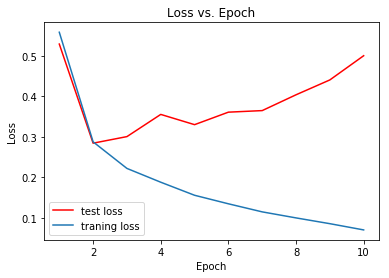

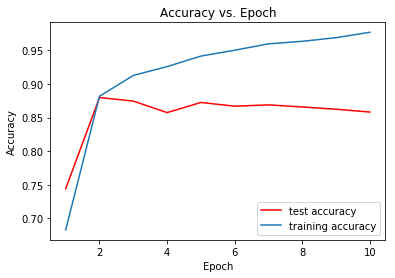

In [63]:
plot_loss(history)
plot_accuracy(history)

In [64]:
rnn = Sequential()
rnn.add(layers.Embedding(max_features, 32, input_length = max_len))
rnn.add(layers.Conv1D(32, 3, activation='relu', kernel_regularizer = regularizers.l2(0.005)))
rnn.add(layers.MaxPooling1D(pool_size=2))
rnn.add(layers.Conv1D(64, 3, activation='relu', kernel_regularizer = regularizers.l2(0.005)))
rnn.add(layers.Flatten())
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = rnn.fit(train_text, 
                  train_labels, 
                  epochs=10, 
                  validation_data=(test_text, test_labels),
                 batch_size=256)

/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 69us/step - loss: 0.7565 - accuracy: 0.6378 - val_loss: 0.4618 - val_accuracy: 0.8486
Epoch 2/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.3865 - accuracy: 0.8685 - val_loss: 0.3754 - val_accuracy: 0.8671
Epoch 3/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.3085 - accuracy: 0.8977 - val_loss: 0.3810 - val_accuracy: 0.8605
Epoch 4/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.2645 - accuracy: 0.9165 - val_loss: 0.3394 - val_accuracy: 0.8804
Epoch 5/10
25000/25000 [==============================] - 2s 60us/step - loss: 0.2351 - accuracy: 0.9299 - val_loss: 0.4287 - val_accuracy: 0.8434
Epoch 6/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.2177 - accuracy: 0.9341 - val_loss: 0.4723 - val_accuracy: 0.8319
Epoch 7/10
25000/25000 [==============================] - 2s 60us/st

In [65]:
rnn.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 250, 32)           320000    
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 248, 32)           3104      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 124, 32)           0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 122, 64)           6208      
_________________________________________________________________
flatten_21 (Flatten)         (None, 7808)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7809      
Total params: 337,121
Trainable params: 337,121
Non-trainable params: 0
_______________________________________________

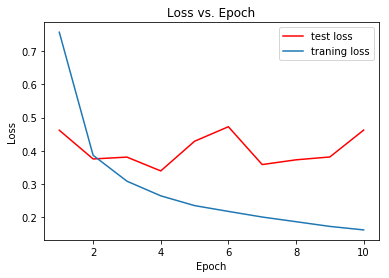

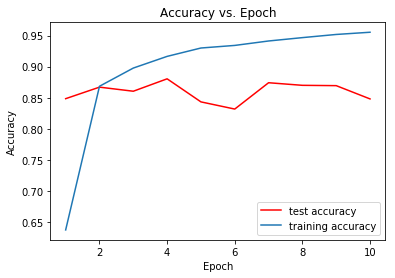

In [66]:
plot_loss(history)
plot_accuracy(history)

### Questions

Both models of part one have similar complexity +/-5,000 parameters but the bidirectional GRU network has a loss/acc of 0.3657/0.8656 which is signicantly worse that any of part one models that presented 0.2845/0.8798 and 0.3394/0.8804

## Part 2
Early stopping is a powerful regularization method. Early stopping can be one of the best ways to prevent over-fitting in any machine learning model, including neural network models. In this exercise you will apply early stopping to a gated recurrent unit (GRU) as follows:

In [68]:
rnn = Sequential()
rnn.add(layers.Embedding(max_features, 32, input_length = max_len))
rnn.add(layers.GRU(32, kernel_regularizer = regularizers.l2(0.005)))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = rnn.fit(train_text, 
                  train_labels, 
                  epochs=15, 
                  validation_data=(test_text, test_labels),
                  batch_size = 256,
                  callbacks=callbacks)

/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 56s 2ms/step - loss: 0.6960 - accuracy: 0.6924 - val_loss: 0.4495 - val_accuracy: 0.8329
Epoch 2/15
25000/25000 [==============================] - 55s 2ms/step - loss: 0.3852 - accuracy: 0.8615 - val_loss: 0.3912 - val_accuracy: 0.8489
Epoch 3/15
25000/25000 [==============================] - 55s 2ms/step - loss: 0.3033 - accuracy: 0.8937 - val_loss: 0.3768 - val_accuracy: 0.8504
Epoch 4/15
25000/25000 [==============================] - 54s 2ms/step - loss: 0.2624 - accuracy: 0.9102 - val_loss: 0.3280 - val_accuracy: 0.8734
Epoch 5/15
25000/25000 [==============================] - 55s 2ms/step - loss: 0.2367 - accuracy: 0.9181 - val_loss: 0.3616 - val_accuracy: 0.8561


In [69]:
rnn.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 250, 32)           320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


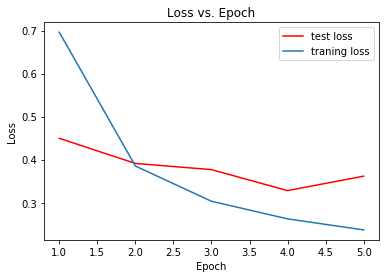

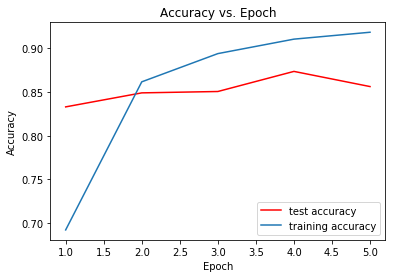

In [70]:
plot_loss(history)
plot_accuracy(history)

### Questions

Part 2 model is significantly less complex than the bidirectional GRU (6k less parameters) but offers a similar performance. With loss/acc of 0.3280/0.8734 for part 2 model and 0.3657/0.8656 of bidirectional GRU. Interestingly all assigment models performed better than the bidirectional GRU.